In [1]:
import numpy as np
import pandas as pd
import copy

In [2]:
data = pd.read_csv('PRSA_data.csv')
pm25 = data.loc[:, "pm2.5"].values.reshape(-1, 1)  #sklearn当中特征矩阵必须是二维

from sklearn.impute import SimpleImputer

## 使用均值填补缺失数据(数值型数据)

In [3]:

data_mean = copy.deepcopy(data)

pm25_mean = SimpleImputer()
pm25_mean = pm25_mean.fit_transform(pm25)

data_mean.loc[:, "pm2.5"] = pm25_mean

## 使用中位数进行填补

In [4]:

data_median = copy.deepcopy(data)

pm25_median = SimpleImputer(strategy="median")  # 使用中位数填补

pm25_median = pm25_median.fit_transform(pm25)

data_median.loc[:, "pm2.5"] = pm25_median

## 使用0进行填补

In [5]:

data_zero = copy.deepcopy(data)

pm25_zero = SimpleImputer(strategy="constant", fill_value=0)  # 使用中位数填补

pm25_zero = pm25_zero.fit_transform(pm25)

data_zero.loc[:, "pm2.5"] = pm25_zero

## 使用众数进行填补

In [6]:

data_mode = copy.deepcopy(data)

pm25_mode = SimpleImputer(strategy="most_frequent")  # 使用中位数填补

pm25_mode = pm25_mode.fit_transform(pm25)

data_mode.loc[:, "pm2.5"] = pm25_mode


## 使用KNN进行填补

In [7]:

from sklearn.impute import KNNImputer

data_knn = copy.deepcopy(data)

pm25_pd = data.loc[:, "pm2.5"]

pm25_knn = KNNImputer(n_neighbors=5)

pm25_knn = pm25_knn.fit_transform(pm25_pd.reset_index())

data_knn.loc[:, "pm2.5"] = pm25_knn[:, 1]


## 使用插值方法进行填补

In [8]:
import pandas as pd
import copy
from scipy import interpolate

data = pd.read_csv('PRSA_data.csv')
data = data.fillna(value=np.nan)

In [9]:
pm25_data = data.loc[:, "pm2.5"].values.reshape(-1, 1)
nan_index, _ = np.where(np.isnan(pm25_data))
non_nan_index, _ = np.where(~np.isnan(pm25_data))

#### 用变量DEWP进行填补

In [10]:
x = data.DEWP.values[non_nan_index]
y = data['pm2.5'].values[non_nan_index]
f = interpolate.interp1d(x, y)
y_new = f(data.DEWP.values[nan_index])
data_interpolation_DEWP = copy.deepcopy(data)
data_interpolation_DEWP.loc[nan_index, 'pm2.5'] = y_new

#### 用变量TEMP进行填补

In [11]:
x = data.TEMP.values[non_nan_index]
y = data['pm2.5'].values[non_nan_index]
f = interpolate.interp1d(x, y)
y_new = f(data.TEMP.values[nan_index])
data_interpolation_TEMP = copy.deepcopy(data)
data_interpolation_TEMP.loc[nan_index, 'pm2.5'] = y_new

#### 用变量PRES进行填补

In [12]:
x = data.PRES.values[non_nan_index]
y = data['pm2.5'].values[non_nan_index]
f = interpolate.interp1d(x, y)
y_new = f(data.PRES.values[nan_index])
data_interpolation_PRES = copy.deepcopy(data)
data_interpolation_PRES.loc[nan_index, 'pm2.5'] = y_new

## 画图

In [14]:
# 数据集转换函数, 输入当前数据集，给出最终完成转换的数据集
# 当前的返回值都是后面的几项特征
def dataset_divide(data_all):
    import copy

    X_y = data_all.iloc[:, 5:]

    cbwd_one_hot = dict(zip(set(X_y['cbwd']), range(4)))


    X_cbwd = copy.deepcopy(X_y['cbwd'].values)
    X_cbwd_new = np.asarray(X_cbwd)
    for i, item in enumerate(X_cbwd):
        X_cbwd_new[i] = cbwd_one_hot[item]

    X_y['cbwd'] = X_cbwd_new

    X_y_numpy = X_y.values


    X_test, y_test = X_y_numpy[[i for i in range(X_y_numpy.shape[0]) if i % 7 == 6]][:, 1:], X_y_numpy[[i for i in range(
    X_y_numpy.shape[0]) if i % 7 == 6]][:, 0]
    X_train, y_train = X_y_numpy[[i for i in range(X_y_numpy.shape[0]) if i % 7 != 6]][:, 1:], X_y_numpy[[i for i in range(
    X_y_numpy.shape[0]) if i % 7 != 6]][:, 0]

    return X_train,y_train,X_test,y_test

In [15]:

def r2_score(X_train,y_train,X_test,y_test):

   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import r2_score

   # 这里可以封装成选择一个模型来得到最终结果
   # 这里封装成模型来得到模型预测值
   lr_1 = LinearRegression().fit(X_train, y_train)

   r2_score_train, r2_score_test = r2_score(y_train, lr_1.predict(X_train)), r2_score(y_test, lr_1.predict(X_test))

   r2_score_tuple = (r2_score_train, r2_score_test)

   return r2_score_tuple

def f1_score(X_train,y_train,X_test,y_test):

   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import f1_score

   lr_1 = LinearRegression().fit(X_train, y_train)

   f1_score_train, f1_score_test = f1_score(y_train, lr_1.predict(X_train)), f1_score(y_test, lr_1.predict(X_test))

   f1_score_tuple = (f1_score_train,f1_score_test)

   return f1_score_tuple


In [16]:
# 单独抽象出线性回归模型
# 可能需要一个switch语句进行模型的选择
# 此块预留，之后可能会用到

In [17]:
# 使用不同的插值方法得到的数据集
data_filled_dict = {
    "mean":data_mean,
    "median": data_median,
     "zero": data_zero,
     "knn":   data_knn,
    "DEWP":data_interpolation_DEWP,
    "PRES":data_interpolation_PRES,
    "TEMP":data_interpolation_TEMP,
    # "interpolation_Iws":data_interpolation_Iws

}
#     "interpolation_Iws":data_interpolation_Iws

# key data_filled_name
# value tuple(train_score,test_score)
r1_score_result_dict  = {}
f1_score_result_dict = {}
for key,value in data_filled_dict.items():

    # 划分数据集
    X_train,y_train,X_test,y_test = dataset_divide(value)

    r1_score_result_dict[key] = r2_score(X_train,y_train,X_test,y_test)

    # f1_score_result_dict[key] = f1_score(X_train,y_train,X_test,y_test)

In [18]:
def plot_function():
    pass

for key, value in r1_score_result_dict.items():
    print(key,value)

mean (0.2432667034355006, 0.2441524475287612)
median (0.24249786117956473, 0.2430223580720433)
zero (0.2315019977018432, 0.231106096330837)
knn (0.24663608032138917, 0.24855102843599808)
DEWP (0.22536171257399562, 0.22826176792671649)
PRES (0.23138577074763222, 0.23405241714954206)
TEMP (0.23628040057849986, 0.23864507495775567)


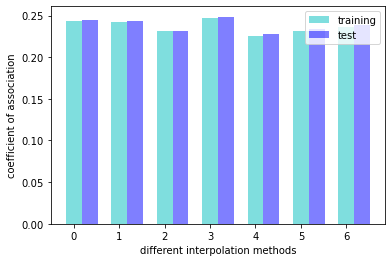

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
y = []
y1 = []

for key, value in r1_score_result_dict.items():
    y.append(value[0])
    y1.append(value[1])

bar_width = 0.35
tick_label = ["A","B","C","D","E"]

# 生成多数据并列柱状图
plt.bar(x,y,bar_width,color="c",align="center",label="training",alpha=0.5)
plt.bar(x+bar_width,y1,bar_width,color="b",align="center",label="test",alpha=0.5)
# 生成多数据平行柱状图
# plt.barh(x,y,bar_width,color="c",align="center",label="班级A",alpha=0.5)
# plt.barh(x+bar_width,y1,bar_width,color="b",align="center",label="班级B",alpha=0.5)

# 设置x,y轴标签
plt.xlabel("different interpolation methods")
plt.ylabel("coefficient of association")

# 设置x轴标签位置
# plt.xticks(x+bar_width/2,tick_label)

plt.legend()

plt.show()

In [59]:
# 数据集转换函数, 输入当前数据集，给出最终完成转换的数据集
# 当前的返回值都是后面的几项特征
def dataset_divide(data_all):
    import copy

    X_y = data_all.iloc[:, 5:]

    cbwd_one_hot = dict(zip(set(X_y['cbwd']), range(4)))


    X_cbwd = copy.deepcopy(X_y['cbwd'].values)
    X_cbwd_new = np.asarray(X_cbwd)
    for i, item in enumerate(X_cbwd):
        X_cbwd_new[i] = cbwd_one_hot[item]

    X_y['cbwd'] = X_cbwd_new

    X_y_numpy = X_y.values


    X_test, y_test = X_y_numpy[[i for i in range(X_y_numpy.shape[0]) if i % 7 == 6]][:, 1:], X_y_numpy[[i for i in range(
    X_y_numpy.shape[0]) if i % 7 == 6]][:, 0]
    X_train, y_train = X_y_numpy[[i for i in range(X_y_numpy.shape[0]) if i % 7 != 6]][:, 1:], X_y_numpy[[i for i in range(
    X_y_numpy.shape[0]) if i % 7 != 6]][:, 0]

    return X_train,y_train,X_test,y_test

In [60]:

def r2_score(X_train,y_train,X_test,y_test):

   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import r2_score

   # 这里可以封装成选择一个模型来得到最终结果
   # 这里封装成模型来得到模型预测值
   lr_1 = LinearRegression().fit(X_train, y_train)

   r2_score_train, r2_score_test = r2_score(y_train, lr_1.predict(X_train)), r2_score(y_test, lr_1.predict(X_test))

   r2_score_tuple = (r2_score_train, r2_score_test)

   return r2_score_tuple

def f1_score(X_train,y_train,X_test,y_test):

   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import f1_score

   lr_1 = LinearRegression().fit(X_train, y_train)

   f1_score_train, f1_score_test = f1_score(y_train, lr_1.predict(X_train)), f1_score(y_test, lr_1.predict(X_test))

   f1_score_tuple = (f1_score_train,f1_score_test)

   return f1_score_tuple


In [61]:
# 单独抽象出线性回归模型
# 可能需要一个switch语句进行模型的选择
# 此块预留，之后可能会用到

In [62]:
# 使用不同的插值方法得到的数据集
data_filled_dict = {
    "mean":data_mean,
    "median": data_median,
     "zero": data_zero,
     "knn":   data_knn,
    "DEWP":data_interpolation_DEWP,
    "PRES":data_interpolation_PRES,
    "TEMP":data_interpolation_TEMP,
    # "interpolation_Iws":data_interpolation_Iws

}
#     "interpolation_Iws":data_interpolation_Iws

# key data_filled_name
# value tuple(train_score,test_score)
r1_score_result_dict  = {}
f1_score_result_dict = {}
for key,value in data_filled_dict.items():

    # 划分数据集
    X_train,y_train,X_test,y_test = dataset_divide(value)

    r1_score_result_dict[key] = r2_score(X_train,y_train,X_test,y_test)

    # f1_score_result_dict[key] = f1_score(X_train,y_train,X_test,y_test)

In [63]:
def plot_function():
    pass

for key, value in r1_score_result_dict.items():
    print(key,value)

mean (0.22871210493771132, 0.2336917880339382)
median (0.22788867171824934, 0.2327812839612825)
zero (0.217298661376928, 0.2218188065278679)
knn (0.23200770084977906, 0.2375670948087315)
DEWP (0.21161216659487692, 0.2187696062952712)
PRES (0.21786452321409622, 0.22398409909299677)
TEMP (0.22276378004561947, 0.22955951892432225)


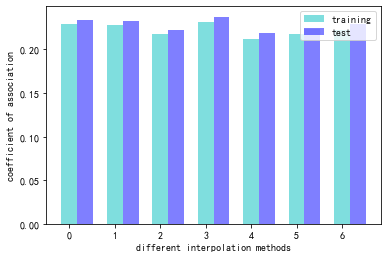

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
y = []
y1 = []

for key, value in r1_score_result_dict.items():
    y.append(value[0])
    y1.append(value[1])

bar_width = 0.35
tick_label = ["A","B","C","D","E"]

# 生成多数据并列柱状图
plt.bar(x,y,bar_width,color="c",align="center",label="training",alpha=0.5)
plt.bar(x+bar_width,y1,bar_width,color="b",align="center",label="test",alpha=0.5)
# 生成多数据平行柱状图
# plt.barh(x,y,bar_width,color="c",align="center",label="班级A",alpha=0.5)
# plt.barh(x+bar_width,y1,bar_width,color="b",align="center",label="班级B",alpha=0.5)

# 设置x,y轴标签
plt.xlabel("different interpolation methods")
plt.ylabel("coefficient of association")

# 设置x轴标签位置
# plt.xticks(x+bar_width/2,tick_label)

plt.legend()

plt.show()

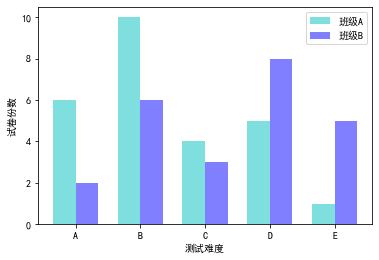

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 防止乱码
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

# 生成数据
x = np.arange(5)
y = [6,10,4,5,1]
y1 = [2,6,3,8,5]

bar_width = 0.35
tick_label = ["A","B","C","D","E"]

# 生成多数据并列柱状图
plt.bar(x,y,bar_width,color="c",align="center",label="班级A",alpha=0.5)
plt.bar(x+bar_width,y1,bar_width,color="b",align="center",label="班级B",alpha=0.5)
# 生成多数据平行柱状图
# plt.barh(x,y,bar_width,color="c",align="center",label="班级A",alpha=0.5)
# plt.barh(x+bar_width,y1,bar_width,color="b",align="center",label="班级B",alpha=0.5)


# 设置x,y轴标签
plt.xlabel("测试难度")
plt.ylabel("试卷份数")

# 设置x轴标签位置
plt.xticks(x+bar_width/2,tick_label)

plt.legend()

plt.show()